<font color = 0000ff size = 5>说在前面</font>

pandas绘图显示 : plt.show()

保存到本地 : plt.savefig('image.png')

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
present = pd.read_table('data.txt', sep=' ')

In [5]:
present.shape

(63, 3)

In [6]:
present.columns

Index([u'year', u'boys', u'girls'], dtype='object')

可以看到这个数据集共有63条记录，共有三个字段：Year，boys，girls。为了简化计算将year作为索引

In [7]:
present_year = present.set_index('year')

plot是画图的最主要方法，Series和DataFrame都有plot方法。

我们可以这样看一下男生出生比例的趋势图：

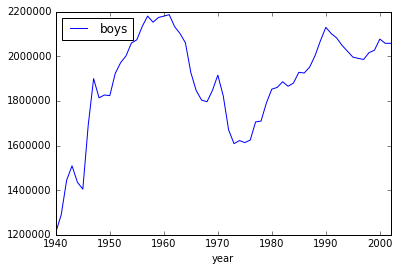

In [8]:
present_year['boys'].plot()
plt.legend(loc='best')

这是Series上的plot方法，通过DataFrame的plot方法，你可以将男生和女生出生数量的趋势图画在一起。

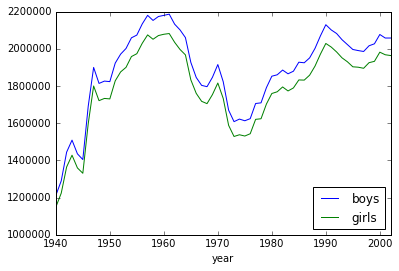

In [9]:
present_year.plot()       #has index,column

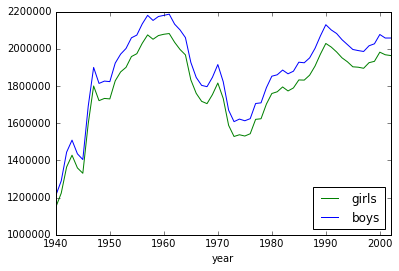

In [10]:
present_year.girls.plot(color='g')
present_year.boys.plot(color='b')
plt.legend(loc='best')

可以看到DataFrame提供plot方法与在多个Series调用多次plot方法的效果是一致。

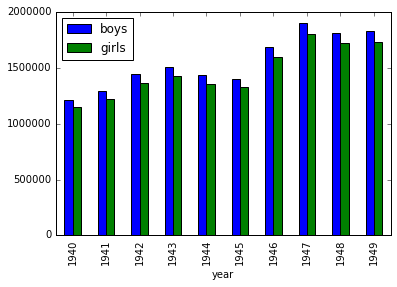

In [11]:
present_year[:10].plot(kind='bar')

plot默认生成是曲线图，你可以通过kind参数生成其他的图形，可选的值为：line, bar, barh, kde, density, scatter。

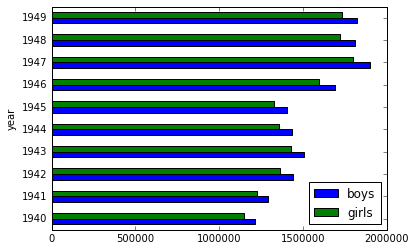

In [12]:
present_year[:10].plot(kind='barh')

如果你需要累积的柱状图，则只需要指定stacked=True。

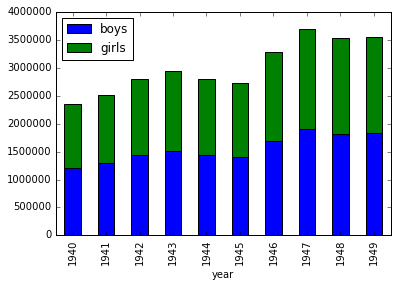

In [13]:
present_year[:10].plot(kind='bar', stacked=True)

制作相对的累积柱状图，需要一点小技巧。

首先需要计算每一行的汇总值，可以在DataFrame上直接调用sum方法，参数为1，表示计算行的汇总。默认为0，表示计算列的汇总。

In [14]:
present_year.sum(1)[:5]

year
1940    2360399
1941    2513427
1942    2808996
1943    2936860
1944    2794800
dtype: int64

有了每一行的汇总值之后，再用每个元素除以对应行的汇总值就可以得出需要的数据。这里可以使用DataFrame的div函数，同样要指定axis的值为0。

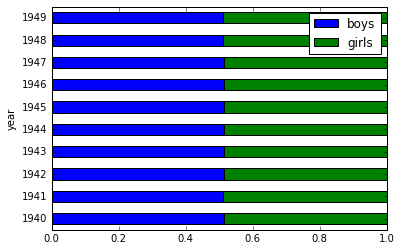

In [15]:
present_year.div(present_year.sum(1),axis=0)[:10].plot(kind='barh', stacked=True)

散点图和相关
plot也可以画出散点图。使用kind='scatter', x和y指定x轴和y轴使用的字段。

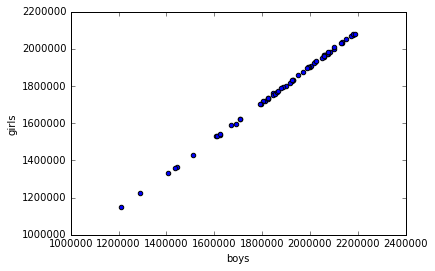

In [16]:
present_year.plot(x='boys', y='girls', kind='scatter')

我们再来载入一下鸢尾花数据。

In [17]:
iris = pd.read_csv('iris.csv')
iris.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
iris.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0947A1B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0A13F810>]], dtype=object)

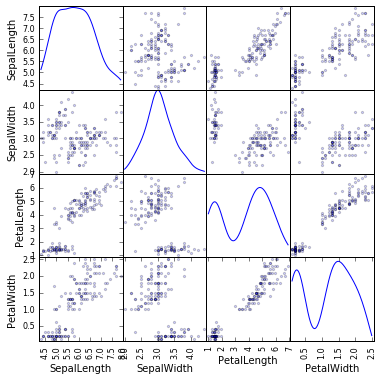

In [19]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(iris, alpha=0.2, figsize=(6, 6), diagonal='kde')

<font size = 6>箱图</font>

DataFrame提供了boxplot方法可以用来画箱图。

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xb24fdd0>,
 'caps': [<matplotlib.lines.Line2D at 0xb25d630>,
 'fliers': [<matplotlib.lines.Line2D at 0xb25dff0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xb25dc90>,
 'whiskers': [<matplotlib.lines.Line2D at 0xb24ff50>,
  <matplotlib.lines.Line2D at 0xb31a770>]}

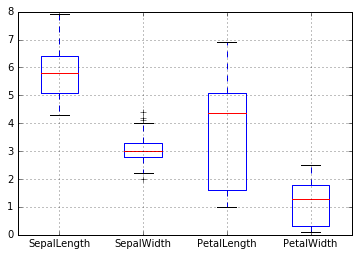

In [20]:
iris.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B1A9850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0B52DAB0>]], dtype=object)

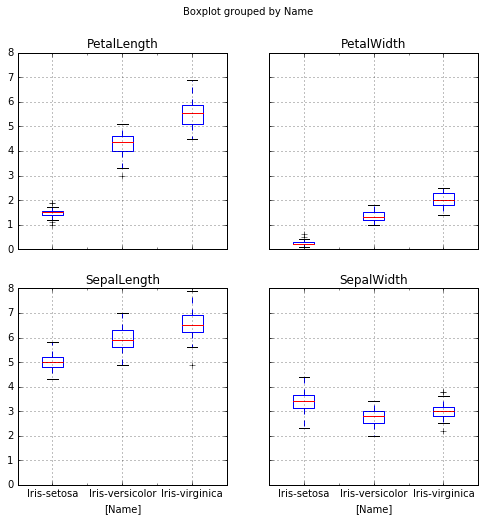

In [21]:
iris.boxplot(by='Name', figsize=(8, 8))

直方图和概率密度分布

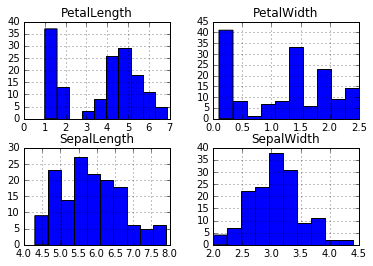

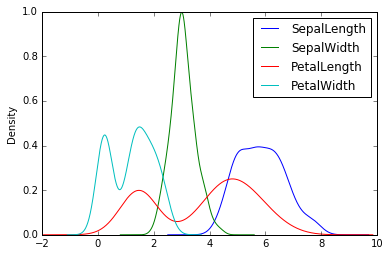

In [22]:
iris.ix[:,:-1].hist()
iris.plot(kind='kde')

多变量的可视化

Radviz

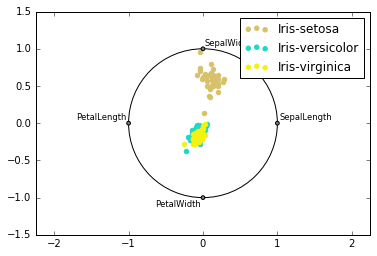

In [23]:
from pandas.tools.plotting import radviz
radviz(iris, 'Name')

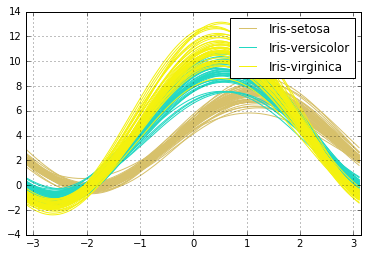

In [24]:
from pandas.tools.plotting import andrews_curves
andrews_curves(iris, 'Name')

Parallel Coordinates

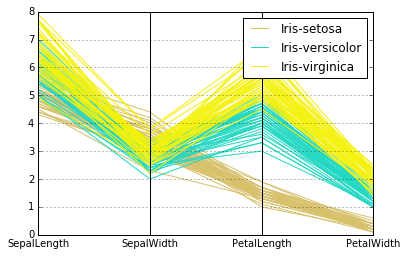

In [25]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris, 'Name')